__Project work__

Проверка гипотезы: средняя оценка фильмов жанра "Ужасы"(Horror), снятых за последние 20 лет отличается от других жанров. Для сравнения будут использованы жанры "Драма"(Drama), "Комедия"(Comedy), "Боевик"(Action). Для упрощения фильмы, характеризующиеся одновременно несколькими жанрами (Драма, Комедия, Боевик), учитываться не будут. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [2]:
pd.set_option("max_rows", 10)

#### Просмотрим общую информацию о датасете:

In [3]:
data1 = pd.read_csv('title.basics.tsv.gz', sep='\t', encoding='utf-8')
data2 = pd.read_csv('title.ratings.tsv.gz', sep='\t', encoding='utf-8')

C:\Users\dvasilyev\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
basics = data1.copy()
ratings = data2.copy()

In [5]:
basics.shape

(6049534, 9)

In [6]:
ratings.shape

(957360, 3)

In [7]:
basics.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,\N,1,Short
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,\N,1,"Short,Sport"
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,\N,1,"Documentary,Short"
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
9,tt0000010,short,Exiting the Factory,La sortie de l'usine Lumière à Lyon,0,1895,\N,1,"Documentary,Short"


In [8]:
ratings.head(10)

,tconst,averageRating,numVotes
0,tt0000001,5.7,1527
1,tt0000002,6.3,186
2,tt0000003,6.6,1173
3,tt0000004,6.3,114
4,tt0000005,6.2,1887
5,tt0000006,5.3,101
6,tt0000007,5.5,609
7,tt0000008,5.5,1634
8,tt0000009,5.5,80
9,tt0000010,6.9,5426


In [9]:
basics['titleType'].unique()

array(['short', 'movie', 'tvMovie', 'tvSeries', 'tvEpisode', 'tvShort',
       'tvMiniSeries', 'tvSpecial', 'video', 'videoGame'], dtype=object)

#### Будем работать с жанром 'movie'

In [10]:
basics = basics.loc[(basics['titleType'] == 'movie')]

In [11]:
basics = basics.loc[(basics['startYear'] != '\\N')]

In [12]:
basics.count()

tconst            465280
titleType         465280
primaryTitle      465280
originalTitle     465280
isAdult           465280
startYear         465280
endYear           465280
runtimeMinutes    465280
genres            465280
dtype: int64

#### Объединим наши датасеты:

In [13]:
df = basics.set_index('tconst').join(ratings.set_index('tconst'))

In [14]:
df.head()

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
tconst,,,,,,,,,,
tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,5.5,80.0
tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,20,"Documentary,News,Sport",5.2,301.0
tt0000335,movie,Soldiers of the Cross,Soldiers of the Cross,0,1900,\N,\N,"Biography,Drama",6.3,39.0
tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N,NaN,NaN
tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Biography,Crime,Drama",6.2,518.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 465280 entries, tt0000009 to tt9916754
Data columns (total 10 columns):
titleType         465280 non-null object
primaryTitle      465280 non-null object
originalTitle     465280 non-null object
isAdult           465280 non-null int64
startYear         465280 non-null object
endYear           465280 non-null object
runtimeMinutes    465280 non-null object
genres            465280 non-null object
averageRating     236729 non-null float64
numVotes          236729 non-null float64
dtypes: float64(2), int64(1), object(7)
memory usage: 59.0+ MB


#### Конвертируем колонку 'startYear' в int64

In [16]:
df['startYear'] = pd.to_numeric(df['startYear'])

#### Отбросим все фильмы без рейтинга и фильмы старше 20 лет: 

In [17]:
df = df[df.startYear > 1999]
df = df[df['averageRating'].notnull()]

In [18]:
df.count()

titleType         119897
primaryTitle      119897
originalTitle     119897
isAdult           119897
startYear         119897
endYear           119897
runtimeMinutes    119897
genres            119897
averageRating     119897
numVotes          119897
dtype: int64

In [19]:
df['genres'].value_counts().head(30)

Drama                            19900
Documentary                      17268
Comedy                            9383
Comedy,Drama                      4438
Horror                            3797
                                 ...  
Biography,Documentary,History      557
Horror,Mystery,Thriller            552
Action,Comedy                      527
Animation                          517
Action,Thriller                    510
Name: genres, Length: 30, dtype: int64

#### Посмотрим распределение оценок для каждого из жанров по годам: 

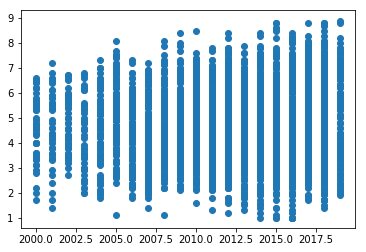

In [20]:
plt.scatter(df.loc[df['genres'] == 'Horror', 'startYear'],
            df.loc[df['genres'] == 'Horror', 'averageRating']);

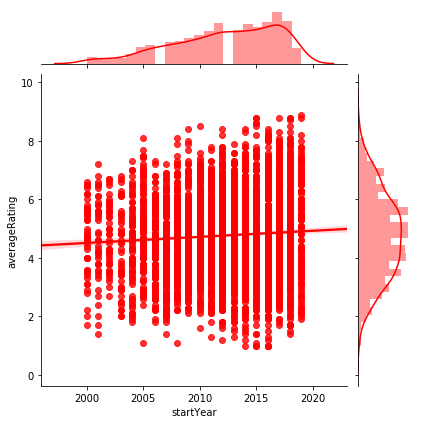

In [21]:
sns.jointplot(df.loc[(df['genres'] == 'Horror', 'startYear')],
            df.loc[df['genres'] == 'Horror', 'averageRating'],kind='reg', color='r');

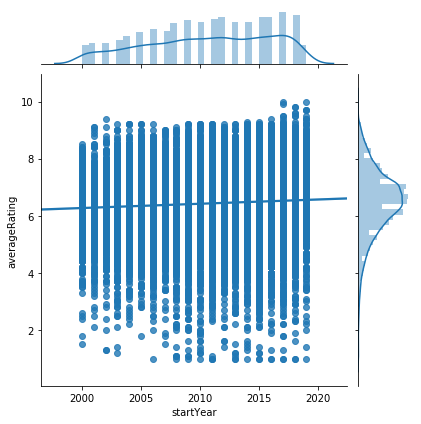

In [22]:
sns.jointplot(df.loc[(df['genres'] == 'Drama', 'startYear')],
            df.loc[df['genres'] == 'Drama', 'averageRating'],kind='reg');

#### Уже на примере жанра "Драма" видна значительно более высокая оценка. Проверием Боевики и Комедии: 

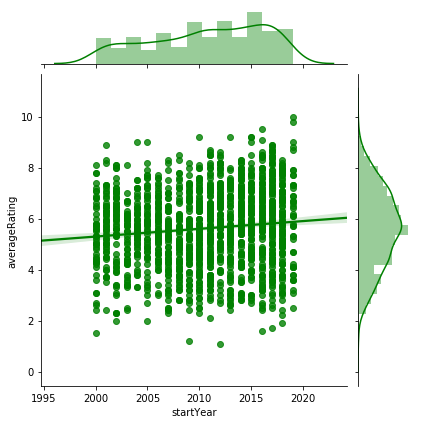

In [23]:
sns.jointplot(df.loc[(df['genres'] == 'Action', 'startYear')],
            df.loc[df['genres'] == 'Action', 'averageRating'],kind='reg', color='g');

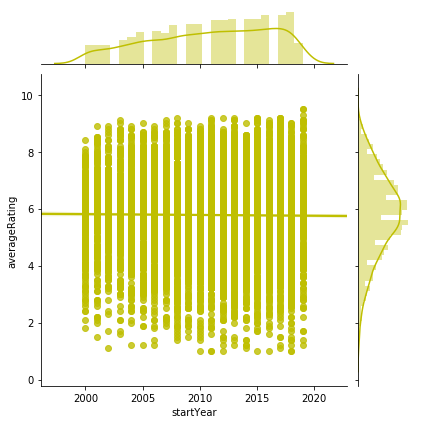

In [24]:
sns.jointplot(df.loc[(df['genres'] == 'Comedy', 'startYear')],
            df.loc[df['genres'] == 'Comedy', 'averageRating'],kind='reg', color='y');

#### Оставим в датасете только интересующие нас жанры и подсчитаем общее количество фильмов по каждому из них

In [25]:
df = df.loc[(df['genres'] == 'Horror') | (df['genres'] == 'Drama') | (df['genres'] == 'Action') | (df['genres'] == 'Comedy')]

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34694 entries, tt0069049 to tt9914942
Data columns (total 10 columns):
titleType         34694 non-null object
primaryTitle      34694 non-null object
originalTitle     34694 non-null object
isAdult           34694 non-null int64
startYear         34694 non-null int64
endYear           34694 non-null object
runtimeMinutes    34694 non-null object
genres            34694 non-null object
averageRating     34694 non-null float64
numVotes          34694 non-null float64
dtypes: float64(2), int64(2), object(6)
memory usage: 2.9+ MB


In [27]:
df.set_index(["genres", "averageRating"]).count(level="genres")

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,numVotes
genres,,,,,,,,
Action,1614,1614,1614,1614,1614,1614,1614,1614
Comedy,9383,9383,9383,9383,9383,9383,9383,9383
Drama,19900,19900,19900,19900,19900,19900,19900,19900
Horror,3797,3797,3797,3797,3797,3797,3797,3797


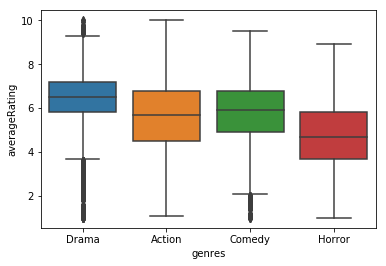

In [28]:
sns.boxplot(x=df['genres'], y=df['averageRating']);

#### Возьмем случайную выборку из 1500 наблюдений по каждому жанру и будем работать с оценками для каждого из жанров. Для проверки нашей гипотезы воспользуемся однофакторным дисперсионным анализом.

In [29]:
n_sample = 1500

In [30]:
horror_sample = df.loc[df['genres'] == 'Horror'].sample(n = n_sample, random_state=42).averageRating.values

horror_sample

array([6.7, 3.3, 6.1, ..., 4.6, 2.6, 5.5])

In [31]:
drama_sample = df.loc[df['genres'] == 'Drama'].sample(n = n_sample, random_state=42).averageRating.values

drama_sample

array([7.2, 7.2, 5.6, ..., 6.5, 7.7, 8. ])

In [32]:
action_sample = df.loc[df['genres'] == 'Action'].sample(n = n_sample, random_state=42).averageRating.values

action_sample

array([4.2, 5.7, 5.1, ..., 7.7, 5.6, 4.6])

In [33]:
comedy_sample = df.loc[df['genres'] == 'Comedy'].sample(n = n_sample, random_state=42).averageRating.values

comedy_sample

array([8.8, 5.8, 6.2, ..., 4.8, 6.9, 5.4])

In [34]:
print("Horror movies: {} \nDrama movies: {} \nAction movies: {} \nComedy movies: {}".format
      (len(horror_sample), len(drama_sample), len(action_sample), len(comedy_sample)))

Horror movies: 1500 
Drama movies: 1500 
Action movies: 1500 
Comedy movies: 1500


#### Найдем средние значения оценок по каждому жанру:

In [35]:
horror_mean = horror_sample.mean()
drama_mean = drama_sample.mean()
action_mean = action_sample.mean()
comedy_mean = comedy_sample.mean()

horror_var = horror_sample.var(ddof=1)
drama_var = drama_sample.var(ddof=1)
action_var = action_sample.var(ddof=1)
comedy_var = comedy_sample.var(ddof=1)

In [36]:
print('Horror rating: mean = {}, std = {}'.format(horror_mean, np.sqrt(horror_var)))
print('Drama rating: mean = {}, std = {}'.format(drama_mean, np.sqrt(drama_var)))
print('Action rating: mean = {}, std = {}'.format(action_mean, np.sqrt(action_var)))
print('Comedy rating: mean = {}, std = {}'.format(comedy_mean, np.sqrt(comedy_var)))

Horror rating: mean = 4.775, std = 1.460617655636582
Drama rating: mean = 6.414, std = 1.1794453757011565
Action rating: mean = 5.6033333333333335, std = 1.5202356066595049
Comedy rating: mean = 5.743133333333334, std = 1.4810655687831353


In [37]:
hs, ds, acs, cs = horror_sample, drama_sample, action_sample, comedy_sample

In [38]:
hm, dm, am, cm = horror_mean, drama_mean, action_mean, comedy_mean

In [39]:
n1 = hs.shape[0]
n2 = ds.shape[0]
n3 = acs.shape[0]
n4 = cs.shape[0]

n1, n2, n3, n4 

(1500, 1500, 1500, 1500)

In [40]:
rating = np.concatenate([hs, ds, acs, cs])
rating_mean = rating.mean()

print('Average rating for all genres: {}'.format(rating_mean))

Average rating for all genres: 5.633866666666666


#### Найдем сумму квадратов отклонений средних групповых значений от общего среднего значения $S_F$: 

In [41]:
S2_F = n1 * (hm - rating_mean) ** 2 + n2 * (dm - rating_mean) ** 2 + n3 * (am - rating_mean) ** 2 + n4 * (cm - rating_mean) ** 2

#### и остаточную сумму квадратов отклонений $S_{res}$:

In [42]:
S2_res = ((hs - hm) ** 2).sum() + ((ds - dm) ** 2).sum() + ((acs - am) ** 2).sum() + ((cs - cm) ** 2).sum()

In [43]:
S2_F, S2_res

(2038.6971866666654, 12035.721106666668)

Проверим выполнение равенства $S^2 = S_F^2 + S_{res}^2:$

In [44]:
S2_F + S2_res == ((rating - rating_mean) ** 2).sum()

True

По этим значениям можно вычислить соответствующие несмещённые оценки дисперсий:

In [45]:
k = 4

n = n1 + n2 + n3 + n4

k1 = k - 1
k2 = n - k

sigma2_F = S2_F / k1
sigma2_res = S2_res / k2

sigma2_F, sigma2_res

(679.5657288888884, 2.007291712252613)

Итак, значение статистики $T$:

In [46]:
T = sigma2_F / sigma2_res
T

338.5485650843791

Зафиксируем уровень значимости $\alpha = 0.025$. Для него найдём критическое значение $F_{crit}$:

In [47]:
alpha = 0.025

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

3.1183048078952744

Видим, что $T > F_{crit}$, поэтому заключаем, что отличие средней оценки фильмов жанра "Ужасы", "Боевики", "Драма" и "Комедии" действительно является статистически значимым.

#### С помощью критерия Стьюдента для двух выборок жанров "Ужасы" и "Драма" проверим гипотезу о неравенстве средней оценки.

Рассмотрим статистику по критерию Стьюдента:
    
$$T = \dfrac{\overline{X_1} -\overline{X_2}}{\sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}}.$$

In [48]:
n1, n2 

(1500, 1500)

In [49]:
X1 = hm
X2 = dm

X1, X2

(4.775, 6.414)

In [50]:
n1, n2 

(1500, 1500)

Несмещенная дисперсии для выборок соответственно:

In [51]:
sig_hs = hs.var(ddof=1)
sig_ds = ds.var(ddof=1)

sig_hs, sig_ds

(2.133403935957305, 1.391091394262842)

Тогда статистика равна: 

In [52]:
T = (X1 - X2) / np.sqrt(sig_hs/n1 + sig_ds/n2)

T

-33.81240897885981

Число степеней свободы: 

In [53]:
f = n1 + n2 - 2 

f

2998

Для уровня значимости $\alpha = 0.05$: 

Сравниваем полученное значение t-критерия Стьюдента 33,812 с критическим при $\alpha=0,05$ значением, указанным в таблице: t_crit = 1.960. 

#### Так как рассчитанное значение критерия $T > t_{crit}$ больше критического, делаем вывод о том, что наблюдаемые различия оценок статистически значимы, гипотеза верна.